In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('2008.csv')

In [3]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [4]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
df = data.dropna(subset = ['ArrDelay'])
df = df.sample(frac=1).head(5000)

df = df.reset_index()

X= df[['AirTime','Distance','DepDelay']]
Y = df[['ArrDelay']]

## K - Fold ¿Qué es y cómo funciona?

In [5]:
kf = KFold(n_splits=10,shuffle = True)

kf.get_n_splits(X)

10

In [6]:
regr = linear_model.LinearRegression()

resultados=[]

for train_index, test_index in kf.split(X):
    X_Train,X_test = X.loc[train_index,],X.loc[test_index,]
    Y_Train, Y_test = Y.loc[train_index], Y.loc[test_index]
    regr.fit(X_Train,Y_Train)
    predicciones = regr.predict(X_test)
    print('R2:',round(r2_score(Y_test,predicciones),3))
    resultados.append(r2_score(Y_test,predicciones))

print('')
print('R2 Medio:',round(np.mean(resultados),3))

R2: 0.895
R2: 0.904
R2: 0.888
R2: 0.913
R2: 0.868
R2: 0.864
R2: 0.83
R2: 0.81
R2: 0.907
R2: 0.909

R2 Medio: 0.879


## Leave One Out

In [7]:
loo = LeaveOneOut()

In [8]:
for train_index, test_index in loo.split(X):
    X_Train,X_test = X.loc[train_index,],X.loc[test_index,]
    Y_Train, Y_test = Y.loc[train_index], Y.loc[test_index]
    regr.fit(X_Train,Y_Train)
    predicciones = regr.predict(X_test)
    print('Error: ',(Y_test - predicciones[0]**2))

  ArrDelay
4507 -261.675886
Error:        ArrDelay
4508 -1.174658
Error:        ArrDelay
4509 -2.697359
Error:        ArrDelay
4510   5.86091
Error:        ArrDelay
4511  4.513186
Error:          ArrDelay
4512 -115.836925
Error:         ArrDelay
4513 -66.939684
Error:         ArrDelay
4514 -73.670932
Error:         ArrDelay
4515 -76.013518
Error:        ArrDelay
4516 -4.997283
Error:         ArrDelay
4517 -12.167248
Error:            ArrDelay
4518 -19550.362271
Error:         ArrDelay
4519 -35.857697
Error:           ArrDelay
4520 -12867.11651
Error:         ArrDelay
4521 -27.827649
Error:        ArrDelay
4522 -33.80134
Error:         ArrDelay
4523  20.175546
Error:        ArrDelay
4524 -1.329123
Error:            ArrDelay
4525 -14747.078553
Error:         ArrDelay
4526 -10.469731
Error:         ArrDelay
4527 -50.448694
Error:         ArrDelay
4528 -44.197851
Error:         ArrDelay
4529 -80.230597
Error:         ArrDelay
4530 -97.547785
Error:          ArrDelay
4531  171.345714
Error:

### /Importante/: se podría guardar en un vector los resultados del error y analizar para ver cómo se comporta (hacer un Histograma).

## XG Boost

In [9]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [10]:
df = data.dropna(subset = ['ArrDelay'])
df = df.sample(frac=1).head(10000)

X= df[['AirTime','TaxiIn','TaxiOut','DepDelay']]
Y = df[['ArrDelay']]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state=1)

In [12]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = XGBRegressor(n_jobs=-1,learning_rate=.5,max_depth=2,
                     colsaple_bytree=1,verbosity=2,subsample=1,n_estimators=500)

model.fit(X_train,y_train)

n64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[13:14:11] INFO: C:\Users\Administrator\

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, colsaple_bytree=1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=2)

In [14]:
predictions = model.predict(X_test)
print('R cuadrado: ',r2_score(y_test,predictions))

R cuadrado:  0.9266163974796503


# Parte 2

#### 2.1 Selección de variables en modelos de ML

In [15]:
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
import pandas as pd

In [16]:
df = data.dropna(subset = ['AirTime','Distance','TaxiIn','TaxiOut','DayofMonth', 'DayOfWeek','Month','DepDelay','WeatherDelay','ArrDelay'])

df = df.sample(frac=1).head(1000)

In [17]:
X= df[['AirTime','Distance','TaxiIn','TaxiOut','DayofMonth', 'DayOfWeek','Month','DepDelay','WeatherDelay']]
Y = df['ArrDelay']


regr = linear_model.LinearRegression()
regr.fit(X,Y)
predicciones = regr.predict(X)

In [18]:
df.isnull().sum()
# np.all(np.isfinite(df))
# np.any(np.isnan(df))

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime                 0
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 0
ActualElapsedTime       0
CRSElapsedTime          0
AirTime                 0
ArrDelay                0
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn                  0
TaxiOut                 0
Cancelled               0
CancellationCode     1000
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64

In [19]:
# test estadístico sobre las variables x e y

x2 = sm.add_constant(X)
est = sm.OLS(Y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     2357.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:14:23   Log-Likelihood:                -3734.6
No. Observations:                1000   AIC:                             7489.
Df Residuals:                     990   BIC:                             7538.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -23.4362      1.449    -16.168   

In [20]:
# Se elimina la variable 'Day of week' y 'Day Of Month'

X= df[['AirTime','Distance','TaxiIn','TaxiOut','Month','DepDelay','WeatherDelay']]
Y = df['ArrDelay']

In [21]:
# test estadístico sobre las variables x e y

x2 = sm.add_constant(X)
est = sm.OLS(Y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     3029.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:16:20   Log-Likelihood:                -3735.8
No. Observations:                1000   AIC:                             7488.
Df Residuals:                     992   BIC:                             7527.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -22.3724      1.143    -19.571   

#### 2.2.Selección automatizada de variables en Machine Learning

In [22]:
from sklearn.feature_selection import RFE
from sklearn import linear_model

In [23]:
df = data.dropna(subset = ['AirTime','Distance','TaxiIn','TaxiOut','DayofMonth', 'DayOfWeek','Month','DepDelay','WeatherDelay','ArrDelay'])

df = df.sample(frac=1).head(10000)

X= df[['AirTime','Distance','TaxiIn','TaxiOut','DayofMonth', 'DayOfWeek','Month','DepDelay','WeatherDelay']]
Y = df['ArrDelay']


regr = linear_model.LinearRegression()

In [31]:
selector = RFE(estimator=regr, n_features_to_select = 1)
selector.fit(X,Y)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [32]:
print(selector.ranking_)

[4 5 2 3 8 9 6 1 7]


In [33]:
X.columns[selector.support_]

Index(['DepDelay'], dtype='object')

#### 2.3 Selección de parámetros en modelos de ML

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [5]:
from sklearn.model_selection import train_test_split
X= df[['AirTime','Distance','TaxiIn','TaxiOut','DayofMonth', 'DayOfWeek','Month','DepDelay','WeatherDelay']]
Y = df['ArrDelay']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

NameError: name 'df' is not defined

In [74]:
alphas = [0.000001,0.0001,0.01,0.1]
layers = [2,5,10,50,100]
solvers = ['lbfgs','adam']

In [75]:
print(len(alphas)*len(layers)*len(solvers))

40


In [79]:
for alpha in alphas:
    for layer in layers:
        for solver in solvers:
            clf = MLPRegressor(solver=solver,alpha=alpha, hidden_layer_sizes = (layer,),warm_start=True,max_iter=10000)
            model = clf.fit(x_train,y_train)
            predicciones = model.predict(x_test)
            print("R cuadrado: ",r2_score(y_test,predicciones),'solver: ',solver, "layers: ",layer, "Alphas: ",alpha)
            

R cuadrado:  0.4336615595020127 solver:  lbfgs layers:  2 Alphas:  1e-06
R cuadrado:  0.4224169917766275 solver:  adam layers:  2 Alphas:  1e-06
R cuadrado:  0.3890997649495347 solver:  lbfgs layers:  5 Alphas:  1e-06
R cuadrado:  0.4390637424329473 solver:  adam layers:  5 Alphas:  1e-06
R cuadrado:  0.46232050272840497 solver:  lbfgs layers:  10 Alphas:  1e-06
R cuadrado:  0.4594741440378215 solver:  adam layers:  10 Alphas:  1e-06
R cuadrado:  0.0008423695078023652 solver:  lbfgs layers:  50 Alphas:  1e-06
R cuadrado:  0.4830254609436021 solver:  adam layers:  50 Alphas:  1e-06
R cuadrado:  -1.3025097020557963 solver:  lbfgs layers:  100 Alphas:  1e-06
R cuadrado:  0.4840725614016925 solver:  adam layers:  100 Alphas:  1e-06
R cuadrado:  0.42185114942743385 solver:  lbfgs layers:  2 Alphas:  0.0001
R cuadrado:  0.4205278874928122 solver:  adam layers:  2 Alphas:  0.0001
R cuadrado:  0.3966291737537079 solver:  lbfgs layers:  5 Alphas:  0.0001
R cuadrado:  0.4206942873827165 solver: 

#### Selección Automártica de parámetros en modelos de ML

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [7]:
df = data.dropna(subset = ['AirTime','Distance','TaxiIn','TaxiOut','DayofMonth', 'DayOfWeek','Month','DepDelay','WeatherDelay','ArrDelay'])

df = df.sample(frac=1).head(10000)

X= df[['AirTime','Distance','TaxiIn','TaxiOut','DayofMonth', 'DayOfWeek','Month','DepDelay','WeatherDelay']]
Y = df['ArrDelay']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
alphas = [0.000001,0.0001,0.01,0.1]
layers = [2,5,10,50,100]
solvers = ['lbfgs','adam']

In [12]:
print(len(alphas)*len(layers)*len(solvers))

40


In [13]:
for alpha in alphas:
    for layer in layers:
        for solver in solvers:
            clf = MLPRegressor(solver = solver,alpha = alpha,hidden_layer_sizes=(layer,),warm_start=True,max_iter=100)
            model = clf.fit(x_train,y_train)
            predictions=model.predict(x_test)
            print('R curadrado: ',r2_score(y_test,predictions),'Solver: ',solver,'Layers: ',layer,'Alpha: ',alpha)
            # Guardar en un DataFrame y usar la función GroupBy asi tenemos un resumen de la media de R2 por cada parámetro.

R curadrado:  -0.00041243649589062237 Solver:  lbfgs Layers:  2 Alpha:  1e-06
R curadrado:  0.7318505213177675 Solver:  adam Layers:  2 Alpha:  1e-06
R curadrado:  0.9729719815652657 Solver:  lbfgs Layers:  5 Alpha:  1e-06
R curadrado:  0.8994514549054456 Solver:  adam Layers:  5 Alpha:  1e-06
R curadrado:  0.9738033662226276 Solver:  lbfgs Layers:  10 Alpha:  1e-06
R curadrado:  0.9598949927191472 Solver:  adam Layers:  10 Alpha:  1e-06
R curadrado:  0.9751831903907598 Solver:  lbfgs Layers:  50 Alpha:  1e-06
R curadrado:  0.9702018511730567 Solver:  adam Layers:  50 Alpha:  1e-06
R curadrado:  0.9753905284939788 Solver:  lbfgs Layers:  100 Alpha:  1e-06
R curadrado:  0.9717769393944656 Solver:  adam Layers:  100 Alpha:  1e-06
R curadrado:  0.9715676914879532 Solver:  lbfgs Layers:  2 Alpha:  0.0001
R curadrado:  0.13033596418534155 Solver:  adam Layers:  2 Alpha:  0.0001
R curadrado:  0.9736958444094534 Solver:  lbfgs Layers:  5 Alpha:  0.0001
R curadrado:  0.8918170980783432 Solver:

#### 2.4.Selección automatizada de parámetros en Machine Learning

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [15]:
df = data.dropna(subset = ['AirTime','Distance','TaxiIn','TaxiOut','DayofMonth', 'DayOfWeek','Month','DepDelay','WeatherDelay','ArrDelay'])

df = df.sample(frac=1).head(10000)

from sklearn.model_selection import train_test_split

X= df[['AirTime','Distance','Month','DepDelay','WeatherDelay']]
Y = df['ArrDelay']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
parametros ={'alpha':[0.0001,0.01],
             'hidden_layer_sizes':[5,50,100],
             'solver' : ['lbfgs','adam'],
             'learning_rate' :('constant','adaptive')}

nn = MLPRegressor(warm_start=True, max_iter=100000)
clf = GridSearchCV(nn, parametros,cv=5,n_jobs=-1)
clf.fit(X,Y)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=100000, warm_start=True),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.01],
                         'hidden_layer_sizes': [5, 50, 100],
                         'learning_rate': ('constant', 'adaptive'),
                         'solver': ['lbfgs', 'adam']})

In [17]:
print(clf.best_params_)

{'alpha': 0.0001, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'solver': 'lbfgs'}


#### 2.5.Fundamentos del Principal Component Analysis (PCA)

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [25]:
df = data.dropna(subset = ['AirTime','Distance','TaxiIn','TaxiOut','DayofMonth', 'DayOfWeek','Month','DepDelay','WeatherDelay','ArrDelay'])

df = df.sample(frac=1).head(10000)

X= df[['AirTime','Distance','TaxiIn','TaxiOut','DayofMonth', 'DayOfWeek','Month','DepDelay','WeatherDelay']]


scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [27]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [29]:
print(np.round(pca.components_,2))

[[ 0.7   0.7   0.1   0.07  0.01  0.02  0.01 -0.1  -0.03]
 [ 0.07  0.09 -0.09 -0.2   0.04  0.05  0.03  0.72  0.64]]


In [30]:
pca.explained_variance_ratio_

array([0.22166057, 0.13962208])

In [31]:
NuevosValores = pca.transform(X)

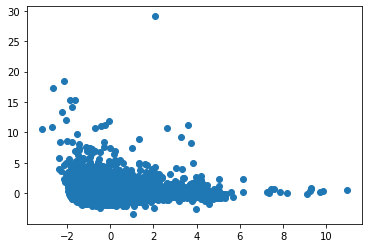

In [33]:
plt.scatter(NuevosValores[:,0],NuevosValores[:,1])

#### 2.7.Imputación de valores en Machine Learning

In [36]:
# Cuando hay una DB son muchos datos faltantes, se puede eliminar la variable, usar un modelo que use los 'NA'
# o reemplazar dicho n/A, dependiendo de la información que proporcionan.
from sklearn.impute import SimpleImputer
from sklearn import linear_model
import pandas as pd
import numpy as np

In [60]:
data = pd.read_csv('2008.csv')

df = df.sample(frac=1).head(10000)

X= df[['AirTime','Distance','TaxiIn','TaxiOut','DayofMonth', 'DayOfWeek','Month','ArrDelay','DepDelay','WeatherDelay','CarrierDelay']]

X

,AirTime,Distance,TaxiIn,TaxiOut,DayofMonth,DayOfWeek,Month,ArrDelay,DepDelay,WeatherDelay,CarrierDelay
1742454,66.0,191,6.0,21.0,1,6,3,27.0,-6.0,0.0,0.0
3576857,79.0,487,12.0,68.0,18,3,6,51.0,8.0,0.0,8.0
192262,43.0,234,3.0,6.0,15,2,1,21.0,31.0,0.0,0.0
4024173,129.0,800,4.0,5.0,10,4,7,78.0,85.0,0.0,7.0
5950063,41.0,226,4.0,32.0,5,3,11,35.0,28.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
662742,44.0,239,3.0,10.0,20,3,2,147.0,145.0,0.0,0.0
3553175,89.0,541,11.0,61.0,29,7,6,226.0,190.0,0.0,0.0
206485,28.0,86,5.0,45.0,24,4,1,59.0,27.0,0.0,59.0
2911678,138.0,647,6.0,9.0,11,7,5,67.0,38.0,0.0,0.0


In [61]:
X['CarrierDelay']=X['CarrierDelay'].replace(0,np.nan)

In [62]:
X

,AirTime,Distance,TaxiIn,TaxiOut,DayofMonth,DayOfWeek,Month,ArrDelay,DepDelay,WeatherDelay,CarrierDelay
1742454,66.0,191,6.0,21.0,1,6,3,27.0,-6.0,0.0,NaN
3576857,79.0,487,12.0,68.0,18,3,6,51.0,8.0,0.0,8.0
192262,43.0,234,3.0,6.0,15,2,1,21.0,31.0,0.0,NaN
4024173,129.0,800,4.0,5.0,10,4,7,78.0,85.0,0.0,7.0
5950063,41.0,226,4.0,32.0,5,3,11,35.0,28.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
662742,44.0,239,3.0,10.0,20,3,2,147.0,145.0,0.0,NaN
3553175,89.0,541,11.0,61.0,29,7,6,226.0,190.0,0.0,NaN
206485,28.0,86,5.0,45.0,24,4,1,59.0,27.0,0.0,59.0
2911678,138.0,647,6.0,9.0,11,7,5,67.0,38.0,0.0,NaN


In [63]:
## Si se reemplaza por la media, se estaría subestimando la varianza de la variable, van a reducir la var de toda la columna 
imp = SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit(X)

SimpleImputer()

In [64]:
x2 = imp.fit_transform(X)

In [65]:
pd.DataFrame(x2)

,0,1,2,3,4,5,6,7,8,9,10
0,66.0,191.0,6.0,21.0,1.0,6.0,3.0,27.0,-6.0,0.0,36.737469
1,79.0,487.0,12.0,68.0,18.0,3.0,6.0,51.0,8.0,0.0,8.000000
2,43.0,234.0,3.0,6.0,15.0,2.0,1.0,21.0,31.0,0.0,36.737469
3,129.0,800.0,4.0,5.0,10.0,4.0,7.0,78.0,85.0,0.0,7.000000
4,41.0,226.0,4.0,32.0,5.0,3.0,11.0,35.0,28.0,0.0,36.737469
...,...,...,...,...,...,...,...,...,...,...,...
9995,44.0,239.0,3.0,10.0,20.0,3.0,2.0,147.0,145.0,0.0,36.737469
9996,89.0,541.0,11.0,61.0,29.0,7.0,6.0,226.0,190.0,0.0,36.737469
9997,28.0,86.0,5.0,45.0,24.0,4.0,1.0,59.0,27.0,0.0,59.000000
9998,138.0,647.0,6.0,9.0,11.0,7.0,5.0,67.0,38.0,0.0,36.737469


In [66]:
X.corr()

,AirTime,Distance,TaxiIn,TaxiOut,DayofMonth,DayOfWeek,Month,ArrDelay,DepDelay,WeatherDelay,CarrierDelay
AirTime,1.000000,0.973000,0.071383,0.044062,0.003864,0.015101,0.002783,-0.012665,-0.068663,-0.007261,-0.006224
Distance,0.973000,1.000000,0.065553,0.033220,0.004306,0.015757,0.010769,-0.021643,-0.037382,-0.010204,-0.020217
TaxiIn,0.071383,0.065553,1.000000,0.001970,-0.005056,-0.003339,0.017005,0.054814,-0.053053,0.007964,0.013038
TaxiOut,0.044062,0.033220,0.001970,1.000000,0.018991,0.005854,0.013554,0.119788,-0.139670,0.065496,0.003435
DayofMonth,0.003864,0.004306,-0.005056,0.018991,1.000000,0.026927,0.066870,0.013249,0.010403,0.002576,0.006474
DayOfWeek,0.015101,0.015757,-0.003339,0.005854,0.026927,1.000000,0.016698,0.015952,0.012501,0.002756,-0.012803
Month,0.002783,0.010769,0.017005,0.013554,0.066870,0.016698,1.000000,-0.003314,0.000089,0.011434,-0.026296
ArrDelay,-0.012665,-0.021643,0.054814,0.119788,0.013249,0.015952,-0.003314,1.000000,0.931295,0.272750,0.827766
DepDelay,-0.068663,-0.037382,-0.053053,-0.139670,0.010403,0.012501,0.000089,0.931295,1.000000,0.248466,0.810113
WeatherDelay,-0.007261,-0.010204,0.007964,0.065496,0.002576,0.002756,0.011434,0.272750,0.248466,1.000000,0.011748


In [69]:
X = X.dropna(subset=['ArrDelay','DepDelay'])
newX=X[['ArrDelay','DepDelay','CarrierDelay']]
newX_train = newX[np.isnan(X.CarrierDelay)==False]

regr = linear_model.LinearRegression()
regr.fit(newX_train[['ArrDelay','DepDelay']],newX_train['CarrierDelay'])


LinearRegression()

In [70]:
regr.coef_

array([0.54799789, 0.20549815])

In [72]:
valores_imputacion = newX[np.isnan(X.CarrierDelay)]
valores_imputacion = valores_imputacion[['ArrDelay','DepDelay']]

In [73]:
NuevosValores = regr.predict(valores_imputacion)

In [74]:
X.loc[np.isnan(X.CarrierDelay),'CarrierDelay'] = NuevosValores

In [75]:
X

,AirTime,Distance,TaxiIn,TaxiOut,DayofMonth,DayOfWeek,Month,ArrDelay,DepDelay,WeatherDelay,CarrierDelay
1742454,66.0,191,6.0,21.0,1,6,3,27.0,-6.0,0.0,6.823966
3576857,79.0,487,12.0,68.0,18,3,6,51.0,8.0,0.0,8.000000
192262,43.0,234,3.0,6.0,15,2,1,21.0,31.0,0.0,11.139410
4024173,129.0,800,4.0,5.0,10,4,7,78.0,85.0,0.0,7.000000
5950063,41.0,226,4.0,32.0,5,3,11,35.0,28.0,0.0,18.194886
...,...,...,...,...,...,...,...,...,...,...,...
662742,44.0,239,3.0,10.0,20,3,2,147.0,145.0,0.0,103.613934
3553175,89.0,541,11.0,61.0,29,7,6,226.0,190.0,0.0,156.153185
206485,28.0,86,5.0,45.0,24,4,1,59.0,27.0,0.0,59.000000
2911678,138.0,647,6.0,9.0,11,7,5,67.0,38.0,0.0,37.785800


In [76]:
X['CarrierDelay'].meana

<bound method Series.mean of 1742454      6.823966
3576857      8.000000
192262      11.139410
4024173      7.000000
5950063     18.194886
              ...    
662742     103.613934
3553175    156.153185
206485      59.000000
2911678     37.785800
999918      13.879400
Name: CarrierDelay, Length: 10000, dtype: float64>